# Etude du prix de l'immobilier à Boston avec Seaborn

Pour cet exercice, vous devrez reproduire et retrouver les lignes de commandes qui ont permis d'obtenir les visualisations affichées.

## Import du dataset

Importation des librairies nécessaires

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

Affichage du dataset

In [10]:
from sklearn import datasets
dataset = datasets.fetch_california_housing()

In [12]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
dataset = pd.DataFrame(columns=data["feature_names"], data=data.data)  
dataset = pd.concat([dataset,pd.DataFrame({"Price":data.target})], axis=1)  
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Visualisation en diagramme en barres

Regarder la documentation concernant la fonction set() de Seaborn et comment la paramétrer afin d'avoir des tailles de visualisation correcte.

In [14]:
sns.set(rc={'figure.figsize':(12.7,8.27)})

<AxesSubplot:xlabel='count', ylabel='HouseAge'>

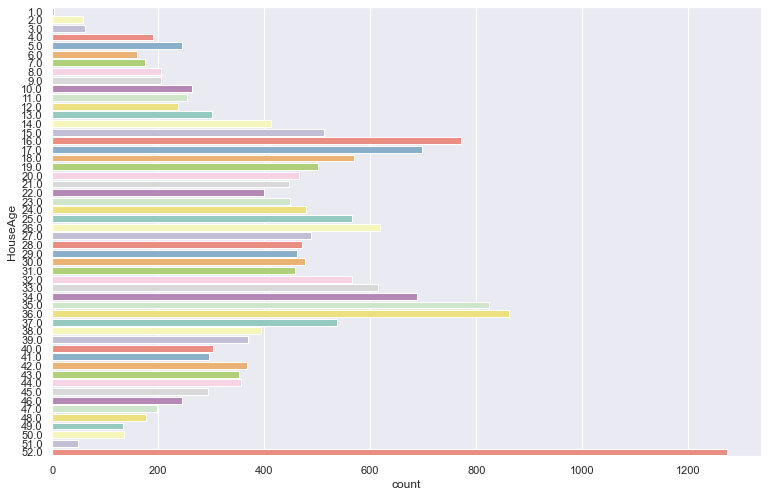

In [15]:
sns.countplot(y="HouseAge", data=dataset, palette="Set3")

Création de la colonne AgeGroup qui découpe la colonne Age en tranche d'age 

In [16]:
dataset['AgeGroup'] = pd.cut(dataset['HouseAge'], [0,10,20,30,40,55])
dataset['AgeGroup']

0        (40, 55]
1        (20, 30]
2        (40, 55]
3        (40, 55]
4        (40, 55]
           ...   
20635    (20, 30]
20636    (10, 20]
20637    (10, 20]
20638    (10, 20]
20639    (10, 20]
Name: AgeGroup, Length: 20640, dtype: category
Categories (5, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 55]]

<AxesSubplot:xlabel='count', ylabel='AgeGroup'>

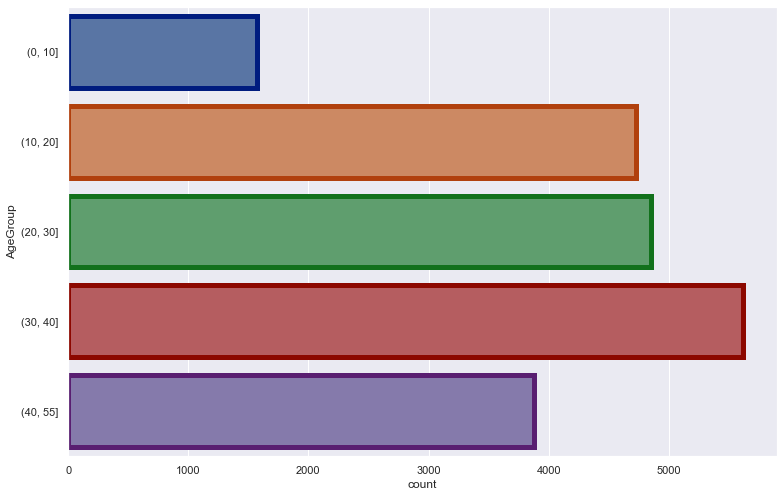

In [17]:
sns.countplot(y='AgeGroup', data=dataset, linewidth=5,edgecolor=sns.color_palette("dark", 5))

## Visualisation en boite à moustaches

C:\Users\veron\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

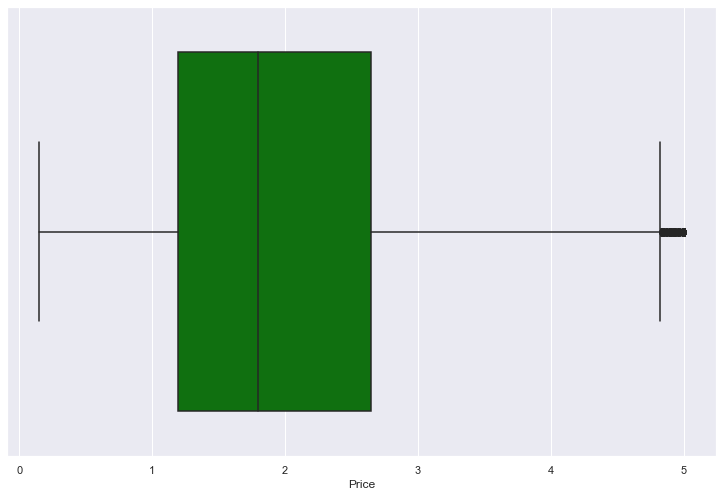

In [18]:
sns.boxplot("Price", data=dataset, color="green")

<AxesSubplot:xlabel='AgeGroup', ylabel='Price'>

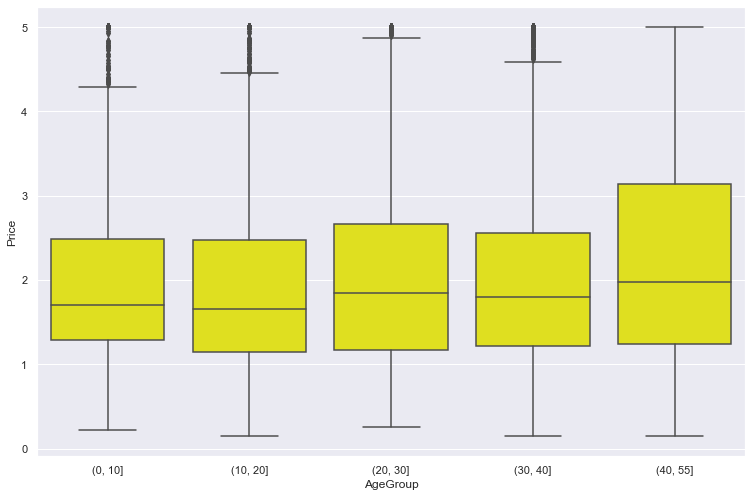

In [19]:
sns.boxplot(x="AgeGroup", y ="Price", data=dataset, color="yellow")

## Visualisation en nuage de point

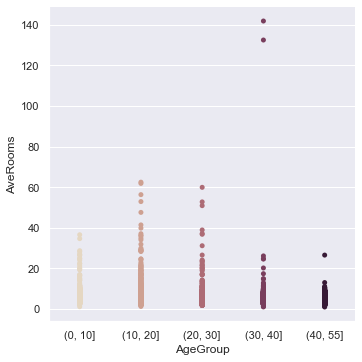

In [20]:
sns.catplot(x="AgeGroup", y="AveRooms", jitter=False, data=dataset, palette = "ch:.25" )

C:\Users\veron\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


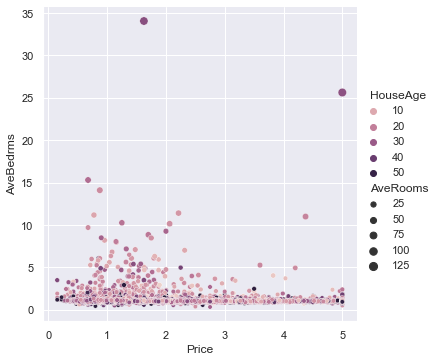

In [21]:
sns.relplot("Price", "AveBedrms", data=dataset, size='AveRooms', hue = "HouseAge")

On créé un nouveau dataset, qu'on nommera dataset_2 qui récupère seulement les données pour lesquels le nombre de chambre (AveBedrms) est inférieur strictement à 5.

In [22]:
dataset_2 = dataset[dataset['AveBedrms']<5]
dataset_2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,AgeGroup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,"(40, 55]"
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,"(20, 30]"
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,"(40, 55]"
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,"(40, 55]"
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,"(40, 55]"


In [23]:
dataset[['MedInc', 'HouseAge', 'AveRooms']]

,MedInc,HouseAge,AveRooms
0,8.3252,41.0,6.984127
1,8.3014,21.0,6.238137
2,7.2574,52.0,8.288136
3,5.6431,52.0,5.817352
4,3.8462,52.0,6.281853
...,...,...,...
20635,1.5603,25.0,5.045455
20636,2.5568,18.0,6.114035
20637,1.7000,17.0,5.205543
20638,1.8672,18.0,5.329513


In [24]:
dataset.iloc[:,0:3]

,MedInc,HouseAge,AveRooms
0,8.3252,41.0,6.984127
1,8.3014,21.0,6.238137
2,7.2574,52.0,8.288136
3,5.6431,52.0,5.817352
4,3.8462,52.0,6.281853
...,...,...,...
20635,1.5603,25.0,5.045455
20636,2.5568,18.0,6.114035
20637,1.7000,17.0,5.205543
20638,1.8672,18.0,5.329513


C:\Users\veron\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


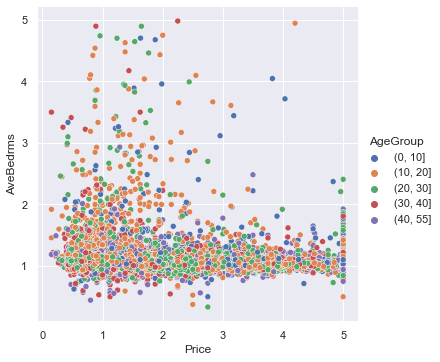

In [25]:
sns.relplot("Price", "AveBedrms", hue="AgeGroup", data=dataset_2)

## Visualisation globale de l'ensemble des variables

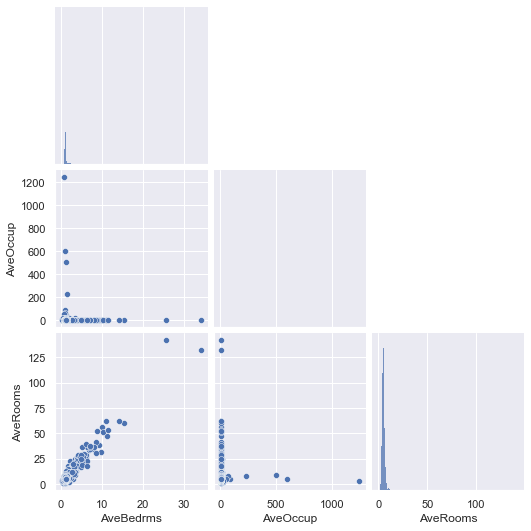

In [26]:
sns.pairplot(dataset, vars=["AveBedrms", "AveOccup", "AveRooms"], corner = True)